<a href="https://colab.research.google.com/github/Dharmin-Shah/Machine-Learning-Projects/blob/master/Decision_Trees_and_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Random Forest Project 

For this project I have explored publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

In [5]:
#Normal imports
import numpy as np
import pandas as pd

In [6]:
# Data Visualisation Libs
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#initial steps for visualization
%matplotlib inline
sns.set_style('whitegrid')

In [8]:
# Machine Learning Libs
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Fetching and checking out the data

In [9]:
loan_df = pd.read_csv('https://raw.githubusercontent.com/Dharmin-Shah/Machine-Learning-Projects/master/Data/loan_data.csv')

In [10]:
loan_df.info() # quick look at the rows, columns and other attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [11]:
loan_df.describe() # quick look at the statistical data

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [12]:
loan_df.head() # quick look at the data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis

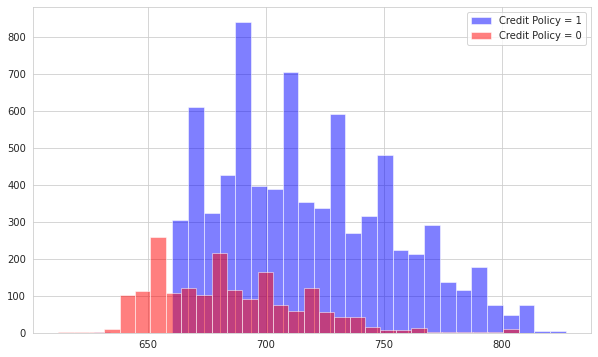

In [13]:
# A look at the FICO distribution for both credit policies

plt.figure(figsize=(10,6))
loan_df[loan_df['credit.policy'] == 1]['fico'].hist(bins=30,color='blue',alpha=0.5,label = 'Credit Policy = 1')
loan_df[loan_df['credit.policy'] == 0]['fico'].hist(bins=30,color='red',alpha=0.5,label = 'Credit Policy = 0')
plt.legend()

** Create a similar figure, except this time select by the not.fully.paid column.**

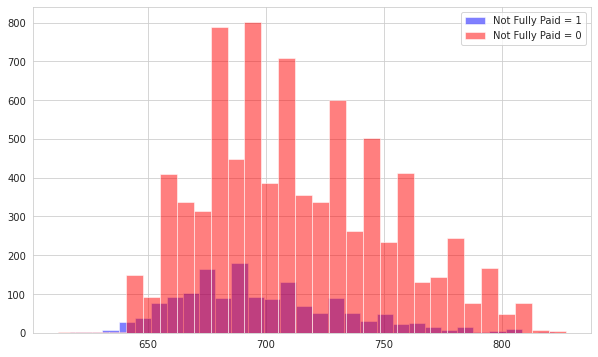

In [14]:
# Similar to above, a look at the FICO distribution based on if the loan was paid or not

plt.figure(figsize=(10,6))
loan_df[loan_df['not.fully.paid'] == 1]['fico'].hist(bins=30,color='blue',alpha=0.5,label = 'Not Fully Paid = 1')
loan_df[loan_df['not.fully.paid'] == 0]['fico'].hist(bins=30,color='red',alpha=0.5,label = 'Not Fully Paid = 0')
plt.legend()

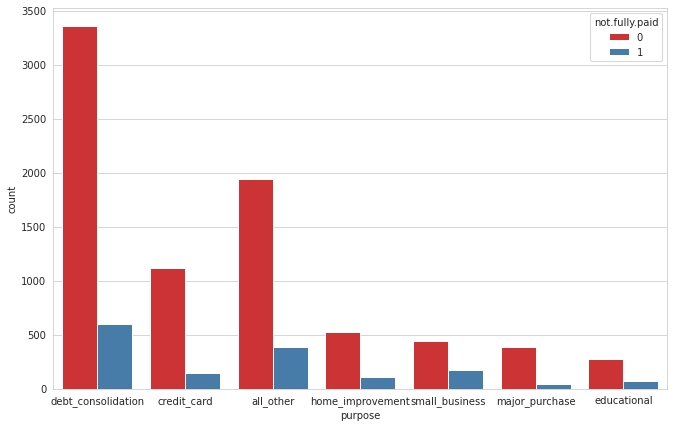

In [15]:
# A quick look at the purpose of loans

plt.figure(figsize=(11,7))
sns.countplot(x='purpose',data=loan_df,hue='not.fully.paid',palette='Set1')

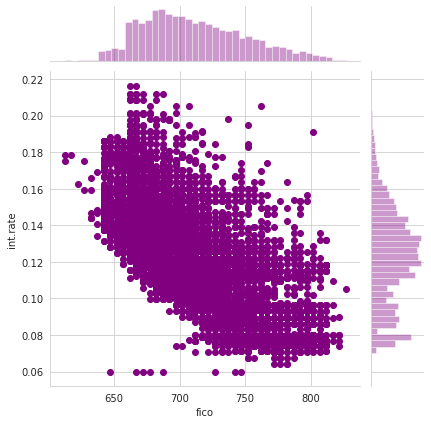

In [16]:
# Visualizing the relationship between intersest rate and fico score

sns.jointplot(y='int.rate',x='fico',data=loan_df,color='purple')

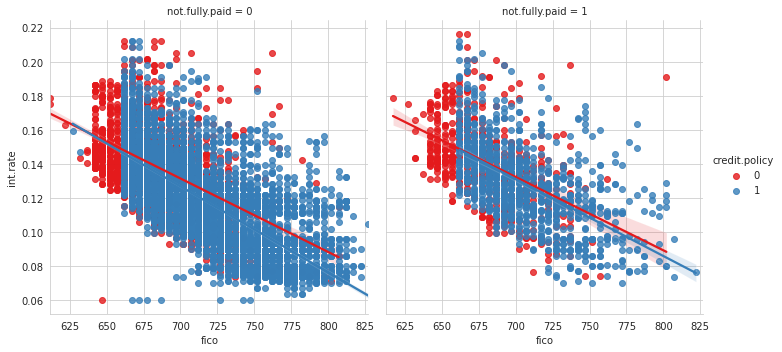

In [17]:
#Linear regression plot to see if the trend differed between not.fully.paid and credit.policy

sns.lmplot(x='fico',y='int.rate',data=loan_df,col='not.fully.paid',hue='credit.policy',palette='Set1')

# Setting up the Data

Let's get ready to set up our data for our Random Forest Classification Model!

## Categorical Features

Notice that the **purpose** column as categorical

That means we need to transform them using dummy variables so sklearn will be able to understand them. Let's do this in one clean step using pd.get_dummies.

In [18]:
cat_feats = ['purpose']

In [19]:
loan = pd.get_dummies(loan_df,columns=cat_feats,drop_first=True)

In [20]:
loan.info() # checking the new columns added

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

## Train Test Split

Now its time to split our data into a training set and a testing set!

In [21]:
X = loan.drop('not.fully.paid',axis=1)
y = loan['not.fully.paid']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=101)

## Training a Decision Tree Model

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
dtree = DecisionTreeClassifier()

In [25]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Predictions and Evaluation of Decision Tree
**Create predictions from the test set and create a classification report and a confusion matrix.**

In [26]:
pred = dtree.predict(X_test)

## Classification Report

In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.73      2874
   macro avg       0.52      0.53      0.52      2874
weighted avg       0.75      0.73      0.74      2874



## Confusion Matrix

In [28]:
print(confusion_matrix(y_test,pred))

[[1990  441]
 [ 340  103]]


#### As we can see the above model was able to achive 73% accuracy. We can still improve it by using Random Forest Model.

## Training the Random Forest model

In [29]:
rfc = RandomForestClassifier(n_estimators=200)

In [30]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Predictions and Evaluation

In [31]:
rfc_pred = rfc.predict(X_test)

### Classification Report

In [32]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.44      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.64      0.51      0.47      2874
weighted avg       0.78      0.85      0.78      2874



### Confusion Matrix

In [33]:
print(confusion_matrix(y_test,rfc_pred))

[[2422    9]
 [ 436    7]]


#### As we can observe, using a Random Forest helped us achieve an accuracy 85%